<a href="https://colab.research.google.com/github/agustinaswd/RAKAMIN_DS26_MiniProject4/blob/main/Mini_Project_4_Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 65.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import date as dt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rakamin/Clicked Ads Dataset.csv')

#Data Understanding

## Adjust Data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
566,566,47.90,42,339273760.0,114.53,Perempuan,2/24/2016 19:08,Yes,Pakanbaru,Riau,House
336,336,87.26,35,441423850.0,184.03,Perempuan,5/12/2016 4:35,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,House
951,951,41.35,27,274354150.0,162.46,Laki-Laki,3/3/2016 3:51,Yes,Medan,Sumatra Utara,Bank


- Change data type **Timestamp** to **datetime**
- Change column name **Male** to **Gender**
- Change column name **Area Income** to **Income**
- Delete column **Unnamed: 0**

##Missing Value

In [ ]:
#check missing value
counts = df.isna().sum().sort_values(ascending=False)
#check % missing value
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#concat
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
Daily Time Spent on Site,13,1.3
Area Income,13,1.3
Daily Internet Usage,11,1.1
Male,3,0.3
Unnamed: 0,0,0.0
Age,0,0.0
Timestamp,0,0.0
Clicked on Ad,0,0.0
city,0,0.0
province,0,0.0


**Daily Time Spent on Site**, **Area Income**, **Daily Internet Usage**, **Male** have missing value and we will handling them in the next step

##Duplicate Value

In [ ]:
#check duplicated
df.duplicated().any()

False

There's no duplicated value

# Task 1 - EDA

## Descriptive Statistics

In [ ]:
df_eda = df.copy()

In [ ]:
df_eda.sample(2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
860,860,91.37,45,363443430.0,182.65,Laki-Laki,4/1/2016 7:37,Yes,Surabaya,Jawa Timur,House
406,406,56.34,50,480995900.0,139.02,Laki-Laki,3/17/2016 23:39,Yes,Tangerang Selatan,Banten,House


In [ ]:
df_eda.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
col = df_eda.columns
nums = []
cats = []

for i in col :
  if df_eda[i].dtype in ['int64','float64'] :
    nums.append(i)
  else :
    cats.append(i)
print(len(nums))
print(len(cats))

5
6


In [ ]:
df_eda[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df_eda[cats].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


## Univariate Analysis

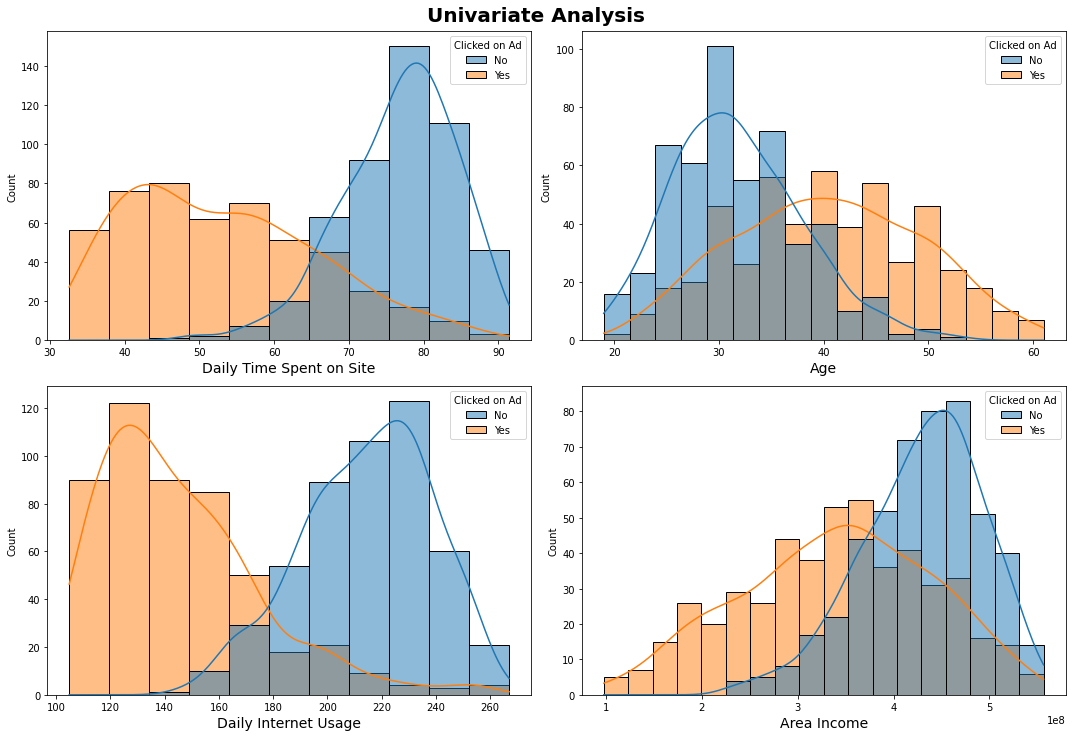

In [ ]:
plt.figure(figsize=(15,10))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Area Income']

for i in range(0,len(features)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df_eda[features[i]], hue=df_eda['Clicked on Ad'], kde=True)
    plt.xlabel(features[i], fontsize=14)
    plt.tight_layout()
plt.suptitle('Univariate Analysis', fontweight='bold', fontsize=20, y=1.02)
plt.savefig('Univariate Analysis', dpi = 200)
plt.tight_layout()
plt.show()

**Daily Time Spent on Site**<br /> 
- Both data for customers who clicked on ads and no are skewed distribution
- Customers who do not click Ads have a much larger breaking point than customers who click Ads
- Column **Daily Time Spent on Site** has a bimodal distribution 

**Age**<br />  
- Both data for customers who clicked on ads and no is the normal distribution
- The distribution of the data in **Age** overall is Normal Distribution

**Daily Internet Usage**<br /> 
- Both data for customers who clicked on ads and no are skewed distribution
- Column **Daily Internet Usage** has a bimodal distribution
- Customers who clicked on Ads and didn't have almost the same peak point of data distribution<br /> 

**Area Income**<br /> 
- Both data for customers who clicked on ads and no is normal distribution
- The distribution of the data in **Area Income** overall is the Normal Distribution

## Bivariate Analysis

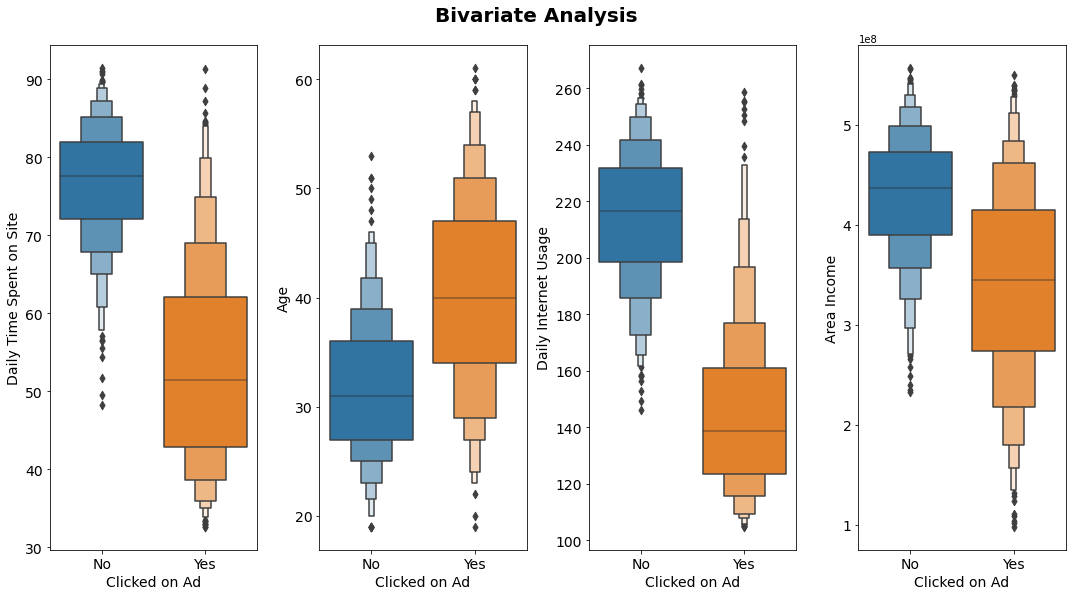

In [ ]:
plt.figure(figsize=(15,8))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Area Income']

for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxenplot(x=df_eda['Clicked on Ad'], y=df_eda[features[i]])
    plt.xlabel('Clicked on Ad', fontsize=14)
    plt.ylabel(features[i], fontsize=14)
    plt.tick_params(axis='both', which = 'major', labelsize=14)
    plt.tight_layout()
plt.suptitle('Bivariate Analysis', fontweight='bold', fontsize=20, y=1.03)
plt.savefig('Bivariate Analysis', dpi = 200)
plt.tight_layout()
plt.show()

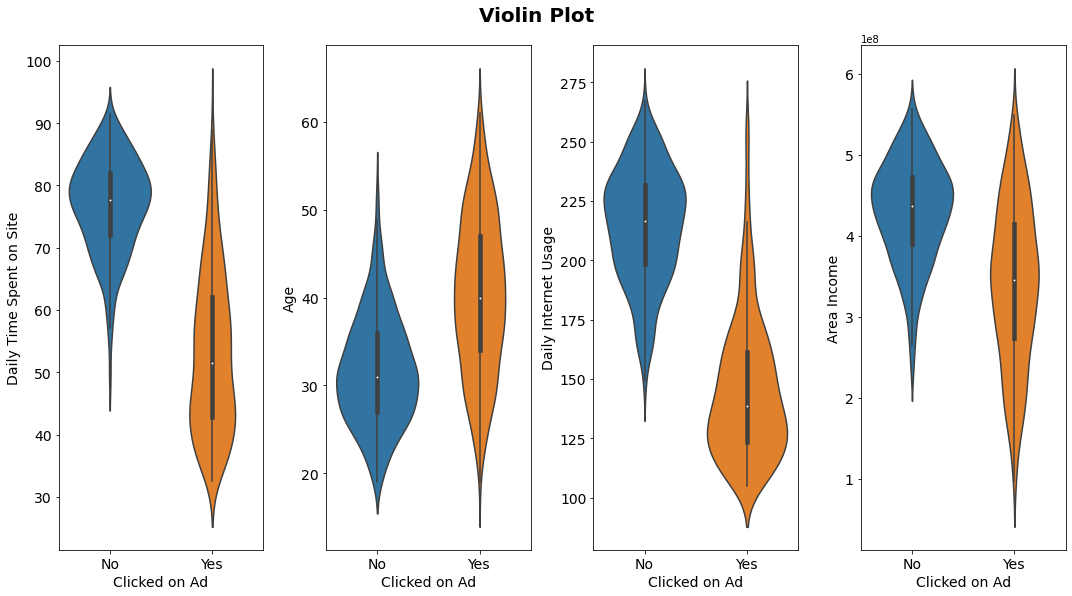

In [ ]:
plt.figure(figsize=(15,8))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Area Income']

for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.violinplot(x=df['Clicked on Ad'], y=df[features[i]])
    plt.xlabel('Clicked on Ad', fontsize=14)
    plt.ylabel(features[i], fontsize=14)
    plt.tick_params(axis='both', which = 'major', labelsize=14)
    plt.tight_layout()
plt.suptitle('Violin Plot', fontweight='bold', fontsize=20, y=1.03)
plt.savefig('Violin Plot', dpi = 200)
plt.tight_layout()
plt.show()

**Daily Time Spent on Site**<br /> 
- Customers with Daily Time Spent on Site 35 - 45 are more clicked on ad
- Customers with Daily Time Spent on Site 70 - 80 are more didn't clicked on ad


**Age**<br />  
- Customers with Age 35 - 45 are more clicked on ad
- Customers with Age 25 - 35 are more didn't clicked on ad


**Daily Internet Usage**<br /> 
- Customers with Daily Internet Usage of 100 - 150 are more clicked on ad
- Customers with Daily Internet Usage of 175 - 225 are more didn't clicked on ad


**Area Income**<br /> 
Customers with an income range of around 380 - 460 million didn't clicked on ad more than those with other income ranges 


## Multivariate Analysis

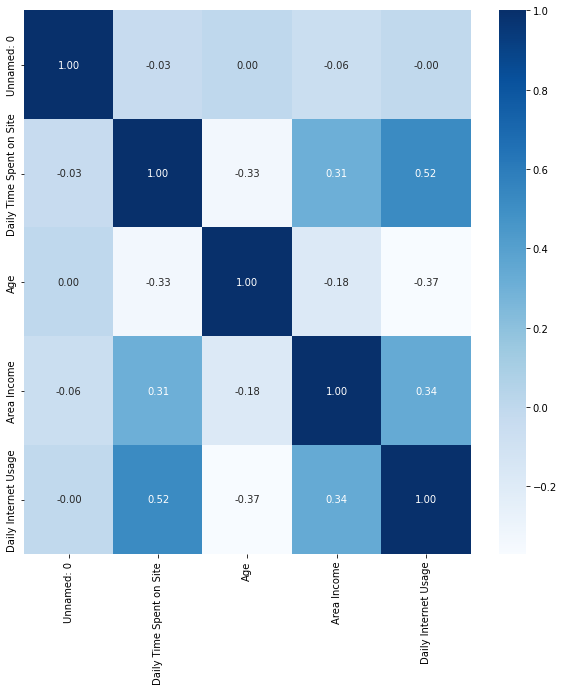

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_eda.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

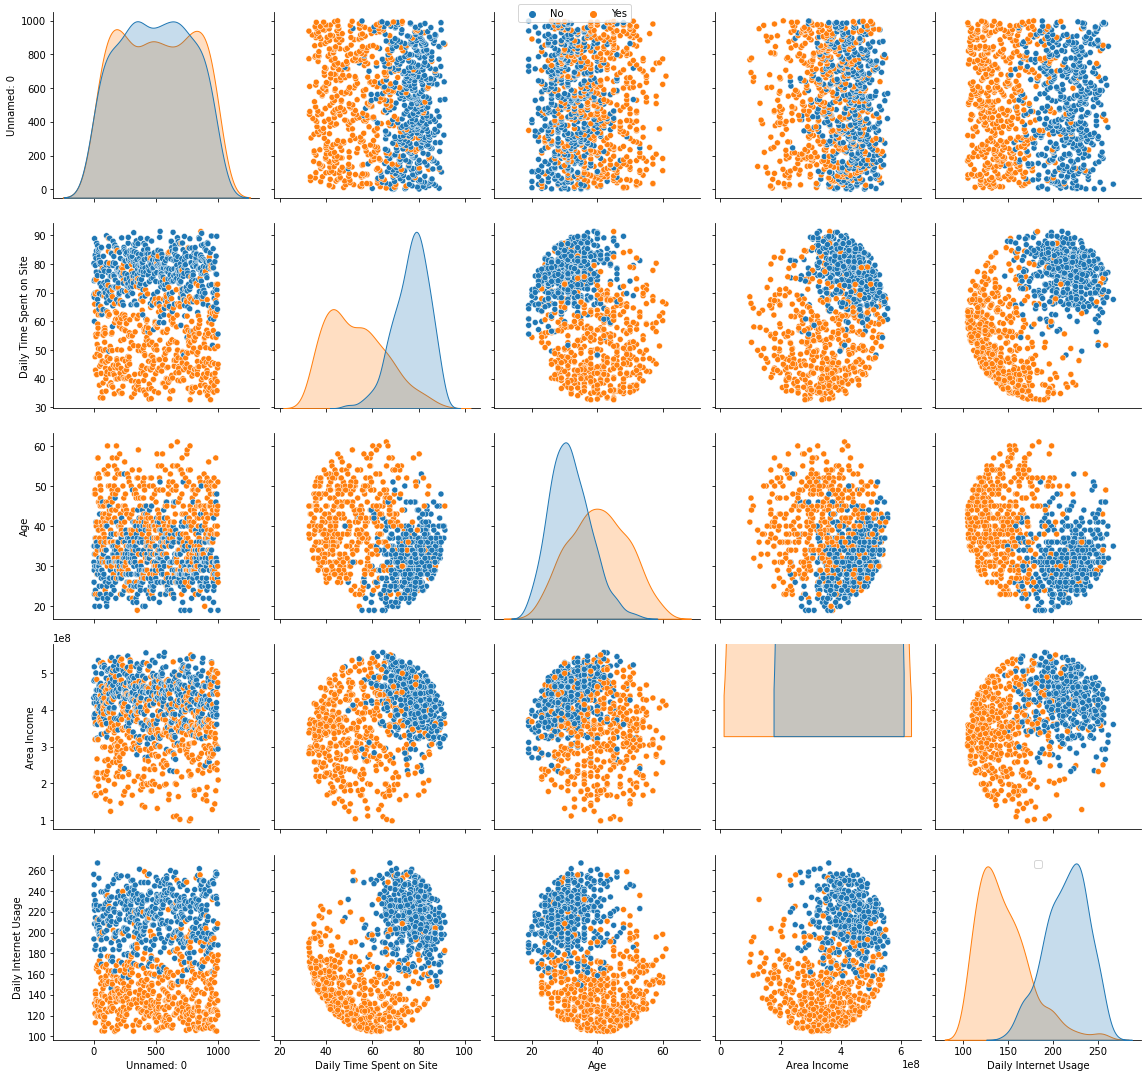

In [ ]:
ax = sns.pairplot(data=df_eda, hue='Clicked on Ad', height=3)
ax._legend.remove()
plt.legend(loc='upper center', ncol=1)
handles = ax._legend_data.values()
labels = ax._legend_data.keys()
ax.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)
plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


- Column **Daily Internet Usage** has a positive correlation with **Daily Time Spent on Site** equal to 0.52 and 0.34 with column **Area Income**
- Column **Daily Internet Usage** and **Age** have a negative correlation equal to -0.37
- Column **Daily Time Spent on Site** has a negative correlation with **Age** equal to -0.33
- From the pairplot above, for columns **Daily Time Spent on Site** and **Daily Internet Usage**, we know that customers who cliked on ad and didn't can be grouped quite clearly


# Task 2 - Data Cleaning & Preprocessing

In [ ]:
df_clean = df.copy()

## Adjust Data

In [ ]:
# Change data type Timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Change column name Male to Gender
df_clean.rename(columns={'Male': 'Gender'}, inplace=True)

# Change column name Area Income to Income
df_clean.rename(columns={'Area Income': 'Income'}, inplace=True)

# Delete column Unnamed: 0
df_clean.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df_clean.sample(3)

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
280,46.37,52,229932710.0,144.27,Perempuan,2016-01-05 00:02:00,Yes,Tangerang Selatan,Banten,Otomotif
50,73.18,23,430683750.0,196.71,Laki-Laki,2016-04-04 07:07:00,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Food
251,61.22,45,447186670.0,119.03,Laki-Laki,2016-01-05 09:42:00,Yes,Palembang,Sumatra Selatan,Fashion


## Handling Missing Value

In [ ]:
# Daily Time Spent on Site 
df_clean['Daily Time Spent on Site'].fillna(
    df_clean['Daily Time Spent on Site'].median(), 
    inplace=True)

#Income 
df_clean['Income'].fillna(df_clean['Income'].median(), inplace=True)

#Daily Internet Usage 
df_clean['Daily Internet Usage'].fillna(
    df_clean['Daily Internet Usage'].median(), inplace=True)

#Gender
df_clean['Gender'].fillna(df_clean['Gender'].mode()[0], inplace=True)

In [ ]:
#check missing value
counts = df_clean.isna().sum().sort_values(ascending=False)
#check % missing value
percentages = round(df_clean.isna().mean() * 100, 3).sort_values(ascending=False)
#concat
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
Daily Time Spent on Site,0,0.0
Age,0,0.0
Income,0,0.0
Daily Internet Usage,0,0.0
Gender,0,0.0
Timestamp,0,0.0
Clicked on Ad,0,0.0
city,0,0.0
province,0,0.0
category,0,0.0


## Feature Encoding

In [ ]:
df_pre = df_clean.copy()

In [ ]:
cats_encode = ['Gender',	'Clicked on Ad',	'city',	'province',	'category'] 

for col in cats_encode:
  print(f'value counts of column {col}')
  print(df_pre[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
Perempuan    521
Laki-Laki    479
Name: Gender, dtype: int64
------------------------------ 

value counts of column Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------ 

value counts of column city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Na

- we will not use **city** in our model cause has many values
- column province have 2 provinces dominant. We will encode province be 3 province, which is Daerah Khusus Ibukota Jakarta, Jawa Barat, etc

In [ ]:
#drop column city
df_pre.drop('city', axis = 1, inplace = True)

In [ ]:
df_pre['province'] = np.where(df_pre['province']=='Daerah Khusus Ibukota Jakarta', 'DKI Jakarta',
                                        np.where(df_pre['province']=='Jawa Barat', 'Jawa Barat', 'Lainnya'))

**Encode Strategy**<br /> 
Label Encoding: Gender, Clicked on Ad<br /> 
One Hot Encoding: province, category


### Label Encoding

In [ ]:
# Gender
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}


df_pre['Gender'] = df_pre['Gender'].map(mapping_gender)

In [ ]:
# Clicked on Ad
mapping_ad = {
    'No' : 0,
    'Yes' : 1
}

df_pre['Clicked on Ad'] = df_pre['Clicked on Ad'].map(mapping_ad)

### One Hot Encoding

In [ ]:
#OHE
prov = pd.get_dummies(df_pre['province'], prefix='province')
cat = pd.get_dummies(df_pre['category'], prefix='category')

In [ ]:
df_pre = df_pre.join(prov)
df_pre = df_pre.join(cat)

In [ ]:
# drop province, category
df_pre_new = df_pre.drop(columns=['province', 'category']).copy()

In [ ]:
df_pre_new.sample(3)

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,province_DKI Jakarta,province_Jawa Barat,province_Lainnya,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
339,65.9,22,423854620.0,211.39,0,2016-07-16 14:13:00,0,0,0,1,0,0,1,0,0,0,0,0,0,0
28,70.2,34,228962580.0,119.20,0,2016-04-14 05:08:00,1,0,0,1,0,0,0,0,0,0,0,1,0,0
139,75.8,38,494029200.0,146.19,1,2016-04-18 11:23:00,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## Split Feature & Target

In [ ]:
df_split = df_pre_new.copy()

In [ ]:
df_split.sample(3)

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,province_DKI Jakarta,province_Jawa Barat,province_Lainnya,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
963,60.75,42,488430250.0,247.05,1,2016-02-19 13:26:00,0,0,0,1,0,1,0,0,0,0,0,0,0,0
474,47.48,31,205514400.0,141.34,0,2016-06-30 00:19:00,1,0,0,1,0,0,0,0,0,0,0,0,1,0
199,77.05,27,466372200.0,191.14,0,2016-01-21 23:48:00,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_split.columns

Index(['Daily Time Spent on Site', 'Age', 'Income', 'Daily Internet Usage',
       'Gender', 'Timestamp', 'Clicked on Ad', 'province_DKI Jakarta',
       'province_Jawa Barat', 'province_Lainnya', 'category_Bank',
       'category_Electronic', 'category_Fashion', 'category_Finance',
       'category_Food', 'category_Furniture', 'category_Health',
       'category_House', 'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
x = df_split[['Daily Time Spent on Site', 'Age', 'Income', 'Daily Internet Usage',
       'Gender', 'Timestamp', 'province_DKI Jakarta',
       'province_Jawa Barat', 'province_Lainnya', 'category_Bank',
       'category_Electronic', 'category_Fashion', 'category_Finance',
       'category_Food', 'category_Furniture', 'category_Health',
       'category_House', 'category_Otomotif', 'category_Travel']
       ].copy()

y = df_split[['Clicked on Ad']].copy()

In [ ]:
print(x.shape)
print(y.shape)

(1000, 19)
(1000, 1)


## Timestamp Extraction

In [ ]:
x['Timestamp'] = pd.to_datetime(x['Timestamp'])

In [ ]:
x['Year'] = x['Timestamp'].dt.year
x['Month'] = x['Timestamp'].dt.month
x['Week'] = x['Timestamp'].dt.isocalendar().week
x['Day'] = x['Timestamp'].dt.day

In [ ]:
#drop column Timestamp
x = x.drop(columns='Timestamp')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Income                    1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Gender                    1000 non-null   int64  
 5   province_DKI Jakarta      1000 non-null   uint8  
 6   province_Jawa Barat       1000 non-null   uint8  
 7   province_Lainnya          1000 non-null   uint8  
 8   category_Bank             1000 non-null   uint8  
 9   category_Electronic       1000 non-null   uint8  
 10  category_Fashion          1000 non-null   uint8  
 11  category_Finance          1000 non-null   uint8  
 12  category_Food             1000 non-null   uint8  
 13  category_Furniture        1000 non-null   uint8  
 14  category_

In [ ]:
x['Week'] = x['Week'].astype('int64')

In [ ]:
x.sample(3)

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,province_DKI Jakarta,province_Jawa Barat,province_Lainnya,category_Bank,category_Electronic,...,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Week,Day
284,47.51,51,375903990.0,130.41,1,0,1,0,0,0,...,0,0,0,0,0,1,2016,5,20,21
876,67.39,44,358800820.0,107.19,0,0,0,1,0,0,...,0,0,0,0,0,0,2016,1,3,24
286,56.01,26,324374750.0,127.26,0,1,0,0,0,0,...,0,0,1,0,0,0,2016,7,27,5


In [ ]:
df_split.to_csv('minpro4_after_split.csv', index=False)

# Task 3 - Data Modeling

## Modeling Without Scalling

In [ ]:
 ! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.8 MB/s eta 0:00:00


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
x_train.shape

(700, 22)

In [ ]:
x_test.shape

(300, 22)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train-mean): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test-mean): '+ str(score['test_score'].mean()))
    print('roc_auc (crossval train-std): '+ str(score['train_score'].std()))
    print('roc_auc (crossval test-std): '+ str(score['test_score'].std()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [ ]:
df_split['Clicked on Ad'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

## Fit Model

### LogReg

In [ ]:
logreg = LogisticRegression(random_state=42) 
logreg.fit(x_train, y_train) 
eval_classification(logreg)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (Test Set): 0.49
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.79


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


roc_auc (crossval train-mean): 0.7692925
roc_auc (crossval test-mean): 0.7693
roc_auc (crossval train-std): 0.004566680276743675
roc_auc (crossval test-std): 0.01741562516822179


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### kNN

In [ ]:
knn = KNeighborsClassifier() 
knn.fit(x_train, y_train) 
eval_classification(knn)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy (Test Set): 0.68
Precision (Test Set): 0.71
Recall (Test Set): 0.64
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.86


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

roc_auc (crossval train-mean): 0.8512875
roc_auc (crossval test-mean): 0.70753
roc_auc (crossval train-std): 0.004060702967929296
roc_auc (crossval test-std): 0.02216419635357891


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(x_train, y_train) 
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
roc_auc (crossval train-mean): 1.0
roc_auc (crossval test-mean): 0.9359999999999999
roc_auc (crossval train-std): 0.0
roc_auc (crossval test-std): 0.011575836902790192


### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
eval_classification(rf)

<ipython-input-41-a894cfd28814>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

roc_auc (crossval train-mean): 1.0
roc_auc (crossval test-mean): 0.9898899999999999
roc_auc (crossval train-std): 0.0
roc_auc (crossval test-std): 0.00767127108111817


### XGB

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
eval_classification(xgb)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

roc_auc (crossval train-mean): 0.99985625
roc_auc (crossval test-mean): 0.9885400000000001
roc_auc (crossval train-std): 0.00010054538776093064
roc_auc (crossval test-std): 0.007080564949211275


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)
eval_classification(ab)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

roc_auc (crossval train-mean): 0.9997775000000001
roc_auc (crossval test-mean): 0.9842700000000001
roc_auc (crossval train-std): 0.00012155245781144939
roc_auc (crossval test-std): 0.006691008892536305


### CatBoost

In [ ]:
cb = CatBoostClassifier(verbose=False)
cb.fit(x_train, y_train)
eval_classification(cb)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train-mean): 1.0
roc_auc (crossval test-mean): 0.98956
roc_auc (crossval train-std): 0.0
roc_auc (crossval test-std): 0.007553701079603263


Because our dataset has sufficiently balanced classes and each label has the same importance in future business analysis, we use the **Accuracy** metric to determine the performance of the Model we make. **We chosee Random Forest for our modeling**

## Modeling With Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

In [ ]:
features = ['Daily Time Spent on Site','Age','Income','Daily Internet Usage']

for col in features :
  x_train_scaled[col] = StandardScaler().fit_transform(x_train_scaled[col].values.reshape(len(x_train_scaled), 1))
  x_test_scaled[col] = StandardScaler().fit_transform(x_test_scaled[col].values.reshape(len(x_test_scaled), 1))

In [ ]:
x_train_scaled.describe()

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,province_DKI Jakarta,province_Jawa Barat,province_Lainnya,category_Bank,category_Electronic,...,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Week,Day
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0,700.000000,700.000000,700.000000
mean,-1.015061e-16,-5.075305e-18,2.537653e-17,2.436147e-16,0.477143,0.244286,0.208571,0.547143,0.084286,0.092857,...,0.108571,0.101429,0.094286,0.110000,0.105714,0.095714,2016.0,3.805714,15.581429,14.995714
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,0.499834,0.429970,0.406578,0.498129,0.278014,0.290440,...,0.311323,0.302111,0.292435,0.313113,0.307691,0.294409,0.0,1.922526,10.040573,8.684173
min,-2.048597e+00,-1.932564e+00,-3.042238e+00,-1.742378e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000
25%,-8.637973e-01,-8.125152e-01,-5.714574e-01,-9.115802e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,2.000000,7.000000,8.000000
50%,2.006905e-01,-1.404861e-01,1.649757e-01,7.898650e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000,15.000000,15.000000
75%,8.461408e-01,6.435479e-01,7.217467e-01,8.897417e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000,22.000000,22.000000
max,1.666848e+00,2.771640e+00,1.840790e+00,1.841941e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.0,7.000000,53.000000,31.000000


In [ ]:
x_test_scaled.describe()

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,province_DKI Jakarta,province_Jawa Barat,province_Lainnya,category_Bank,category_Electronic,...,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Week,Day
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000
mean,9.888386e-16,-1.006602e-16,1.184238e-17,-1.302662e-16,0.483333,0.273333,0.213333,0.513333,0.103333,0.106667,...,0.076667,0.09000,0.126667,0.106667,0.126667,0.103333,2016.0,3.843333,15.033333,16.623333
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,0.500557,0.446415,0.410346,0.500657,0.304902,0.309205,...,0.266506,0.28666,0.333155,0.309205,0.333155,0.304902,0.0,1.940276,8.906738,8.758453
min,-2.077215e+00,-1.956663e+00,-3.105836e+00,-1.667127e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000
25%,-7.971664e-01,-7.662373e-01,-6.370199e-01,-9.202263e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2016.0,2.000000,8.000000,9.000000
50%,1.843488e-01,-1.710245e-01,1.436050e-01,4.000844e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000,14.500000,17.000000
75%,8.602387e-01,6.622735e-01,8.175077e-01,8.187361e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2016.0,5.250000,22.000000,24.000000
max,1.686362e+00,2.924082e+00,1.697085e+00,2.074410e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2016.0,7.000000,53.000000,31.000000


In [ ]:
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(x_train_scaled, y_train)
eval_classification(rf_scaled)

<ipython-input-50-a9a60ea08916>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_scaled.fit(x_train_scaled, y_train)


Accuracy (Test Set): 0.49
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.48
roc_auc (train-proba): 0.57


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed whe

roc_auc (crossval train-mean): 1.0
roc_auc (crossval test-mean): 0.9898899999999999
roc_auc (crossval train-std): 0.0
roc_auc (crossval test-std): 0.00767127108111817


Cause accuracy model with scalling equal to 0.49, so we used dataset without scalling with accuracy model equal to 0.95 with Random Forest 

## Model Evaluation

### Confusion Matrix

In [ ]:
y_predicted = rf.predict(x_test)
y_predicted

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_predicted, labels=[1,0])

array([[147,   7],
       [  7, 139]])

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.95      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



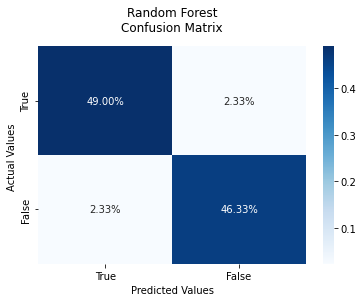

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predicted, labels=[1,0])
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Blues', annot=True, fmt='.2%')

plt.title('Random Forest\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

### SHAP Values

In [ ]:
import shap
shap.initjs()

In [ ]:
x_sampled = x_train.sample(100, random_state=10)

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_sampled)

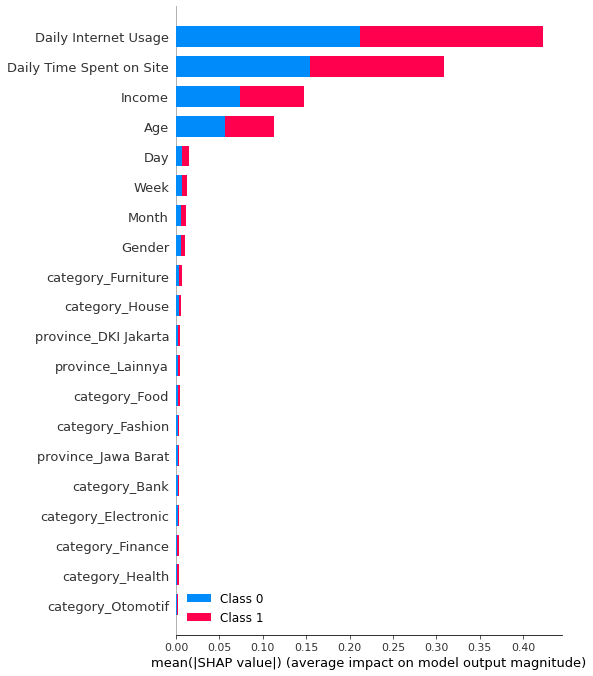

In [ ]:
shap.summary_plot(shap_values, x_sampled)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Income                    1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Gender                    1000 non-null   int64  
 5   province_DKI Jakarta      1000 non-null   uint8  
 6   province_Jawa Barat       1000 non-null   uint8  
 7   province_Lainnya          1000 non-null   uint8  
 8   category_Bank             1000 non-null   uint8  
 9   category_Electronic       1000 non-null   uint8  
 10  category_Fashion          1000 non-null   uint8  
 11  category_Finance          1000 non-null   uint8  
 12  category_Food             1000 non-null   uint8  
 13  category_Furniture        1000 non-null   uint8  
 14  category_

- Daily Internet Usage and Daily Time Spent on Site feature the most importance. We will use these two features to determine the future marketing success
- From EDA, we know that customers with Daily Internet Usage of 100 - 150, Customers with Daily Time Spent on Site 35 - 45 are more clicked on ad
- We can also use Income & Age to determine future marketing success.
- From EDA, we know that customers with Age 35 - 45 are more clicked on ad
- Customers with an income range of around 380 - 460 million didn't clicked on ad more than those with other income ranges


# Task 4 - Business Recommendation & Simulation

## Recommendation

In [ ]:
df_recom = df_clean.copy()

In [ ]:
df_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Income                    1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Gender                    1000 non-null   object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


### Daily Internet Usage 

In [ ]:
df_recom.sample(3)

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
837,55.77,49,391594280.0,117.33,Laki-Laki,2016-03-15 14:33:00,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Furniture
986,76.44,28,419770330.0,232.68,Laki-Laki,2016-04-06 17:26:00,No,Semarang,Jawa Tengah,Otomotif
855,50.87,24,440576500.0,190.41,Perempuan,2016-05-10 17:13:00,Yes,Surabaya,Jawa Timur,Food


In [ ]:
#cluster of Daily Internet Usage
diu_list = []
for i in df_recom['Daily Internet Usage']:
    if i >= 100 and i <= 140:
        group = '100 - 140'
    elif i >= 141 and i <= 180:
        group = '141 - 180'
    elif i >= 181 and i <= 210:
        group = '181 - 210'
    elif i >= 211 and i <= 240:
        group = '211 - 240'
    else: 
        group = '> 240'
    diu_list.append(group)
df_recom['Daily Internet Usage Group'] = diu_list

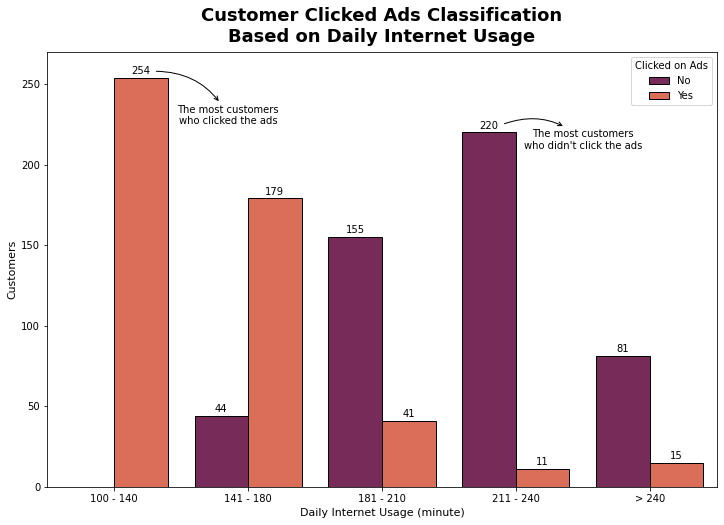

In [ ]:
df_recom['Daily Internet Usage Group'] = pd.Categorical(df_recom['Daily Internet Usage Group'], ['100 - 140','141 - 180','181 - 210','211 - 240', '> 240'])

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Customer Clicked Ads Classification\nBased on Daily Internet Usage', fontsize=18, color='black', weight='bold', pad=10)
sns.countplot(x='Daily Internet Usage Group', data=df_recom, hue='Clicked on Ad', edgecolor='black', palette='rocket')

plt.xlabel('Daily Internet Usage (minute)', fontsize=11)
plt.ylabel('Customers', fontsize=11)
plt.ylim(0, 270)
plt.legend(loc='upper right', title='Clicked on Ads')

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
ax.annotate("The most customers\nwho didn't click the ads",
            xy=(2.9, 225), xytext=(3.5, 210), arrowprops=dict(facecolor='steelblue',arrowstyle="<-",connectionstyle="arc3,rad=.3"),
            ha='center')
ax.annotate("The most customers\nwho clicked the ads",
            xy=(0.3, 258), xytext=(0.85, 225), arrowprops=dict(facecolor='steelblue',arrowstyle="<-",connectionstyle="arc3,rad=.3"),
            ha='center')


plt.show()


### Daily Time Spent on Site

In [ ]:
#cluster Daily Time Spent on Site
dtss_list = []
for i in df_recom['Daily Time Spent on Site']:
    if i >= 30 and i <= 45:
        group = '30 - 45'
    elif i >= 46 and i <= 60:
        group = '46 - 60'
    elif i >= 61 and i <= 75:
        group = '61 - 75'
    else: 
        group = '> 75'
    dtss_list.append(group)
df_recom['Daily Time Spent on Site Group'] = dtss_list

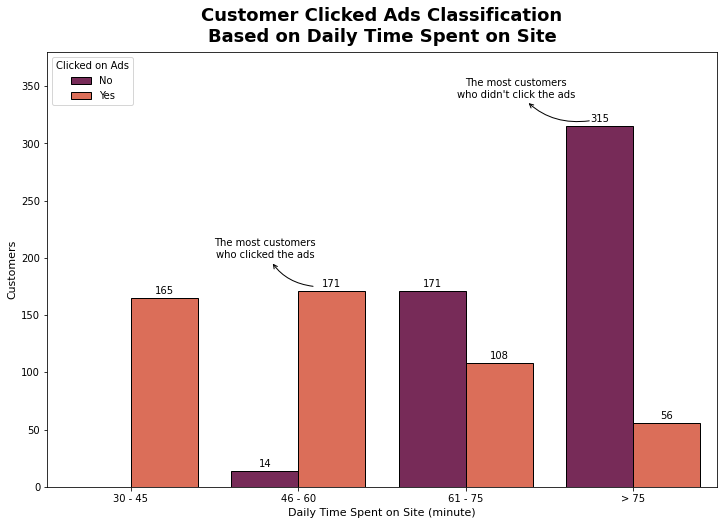

In [ ]:
df_recom['Daily Time Spent on Site Group'] = pd.Categorical(df_recom['Daily Time Spent on Site Group'], ['30 - 45', '46 - 60', '61 - 75','> 75'])

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Customer Clicked Ads Classification\nBased on Daily Time Spent on Site', fontsize=18, color='black', weight='bold', pad=10)
sns.countplot(x='Daily Time Spent on Site Group', data=df_recom, hue='Clicked on Ad', edgecolor='black', palette='rocket')

plt.xlabel('Daily Time Spent on Site (minute)', fontsize=11)
plt.ylabel('Customers', fontsize=11)
plt.ylim(0, 380)
plt.legend(loc='upper left', title='Clicked on Ads')

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

ax.annotate("The most customers\nwho didn't click the ads",
            xy=(2.75, 320), xytext=(2.3, 340), arrowprops=dict(facecolor='steelblue',arrowstyle="<-",connectionstyle="arc3,rad=.3"),
            ha='center')
ax.annotate("The most customers\nwho clicked the ads",
            xy=(1.1, 175), xytext=(0.8, 200), arrowprops=dict(facecolor='steelblue',arrowstyle="<-",connectionstyle="arc3,rad=.3"),
            ha='center')

plt.show()
